## 라이브러리 로드

In [ ]:
# 데이터 분석을 위한 pandas
# 수치 계산을 위한 numpy
# 데이터 시각화를 위한 matplotlib, seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터셋 불러오기

In [ ]:
df = sns.load_dataset("mpg")
df.shape

(398, 9)

## 범주형 변수

범주형 데이터 유일값(unique)의 빈도수

In [ ]:
# nunique 값 구하기
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

## 1개  변수의 빈도수

In [ ]:
# origin의 빈도수
df["origin"].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

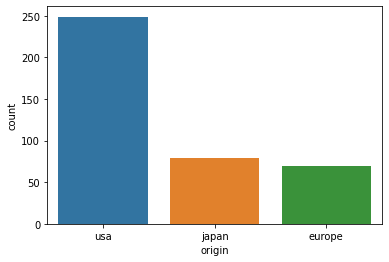

In [ ]:
# countplot 으로 origin 빈도수 시각화
sns.countplot(data=df, x="origin")

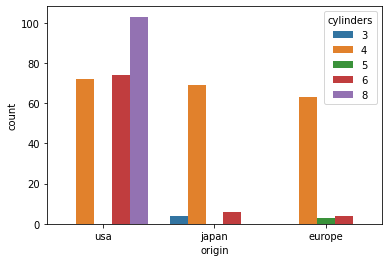

In [ ]:
# countplot 으로 origin 빈도수 시각화 
# -> hue옵션에 cylinders값을 넣어 cylinders값마다 다른 색상 표현
sns.countplot(data=df, x="origin", hue="cylinders")

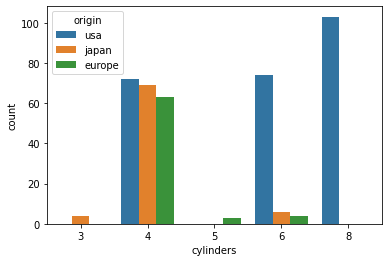

In [ ]:
# countplot으로 cylinders의 빈도수를 시각화하고 origin으로 다른 색상으로 표현
sns.countplot(data=df, x="cylinders", hue="origin")

In [ ]:
# pd.crosstab으로 
pd.crosstab(df["origin"], df["cylinders"])

cylinders,3,4,5,6,8
origin,,,,,
europe,0,63,3,4,0
japan,4,69,0,6,0
usa,0,72,0,74,103


## 범주형 VS 수치형 변수

In [ ]:
sns.barplot?

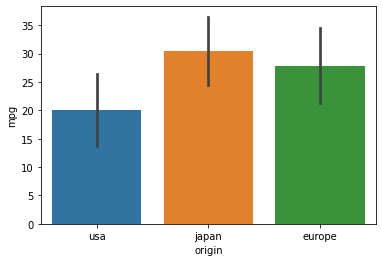

In [ ]:
# barplot 으로 origin(범주형 변수) 별 mpg(수치형 변수) 값 구하기
# barplot은 estimator=<function mean at 0x7fd6d646a5f0>(평균값)이 기본이므로 y축의 평균값을 barplot으로 표시하게 됨.
sns.barplot(data=df, x="origin", y ="mpg", ci="sd")

## groupby를 통한 연산


In [ ]:
# groupby를 통해 origin별로 그룹화하고 mpg 평균 구하기
df.groupby("origin")["mpg"].count()

origin
europe     70
japan      79
usa       249
Name: mpg, dtype: int64

## pivot table을 통한 연산

In [ ]:
pd.pivot(data=df, index="origin", values="mpg",)

In [ ]:
# pivot table로 위와 같은 값 구하기
pd.pivot_table(data=df, index="origin", values="mpg")

,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


## barplot, groupby, pivot table 응용

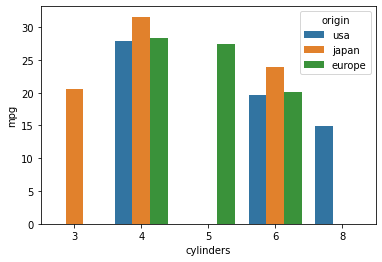

In [ ]:
# barplot에 hue를 사용하여 색상을 다르게 표현하기
sns.barplot(data=df, x="cylinders", y="mpg", ci=None, hue="origin")

In [ ]:
# groupby를 통해 위 시각화에 대한 값 구하기
df.groupby(["cylinders", "origin"])["mpg"].mean().unstack()

origin,europe,japan,usa
cylinders,,,
3,NaN,20.550000,NaN
4,28.411111,31.595652,27.840278
5,27.366667,NaN,NaN
6,20.100000,23.883333,19.663514
8,NaN,NaN,14.963107


In [ ]:
# pivot_table을 통해 위 시각화에 대한 값 구하기
pd.pivot_table(data=df, index="cylinders", columns="origin", values="mpg")

origin,europe,japan,usa
cylinders,,,
3,NaN,20.550000,NaN
4,28.411111,31.595652,27.840278
5,27.366667,NaN,NaN
6,20.100000,23.883333,19.663514
8,NaN,NaN,14.963107


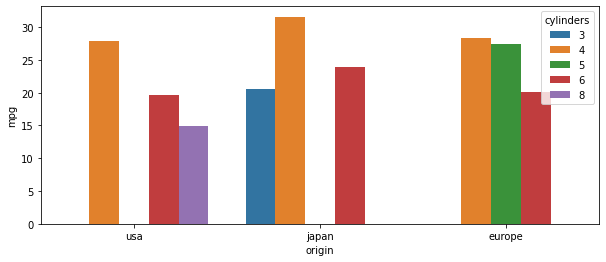

In [ ]:
# cylinders와 mpg의 x, hue 값을 변경하여 시각화해보기
plt.figure(figsize=(10,4))
sns.barplot(data=df, x="origin", y="mpg", hue="cylinders", ci=None)

## boxplot

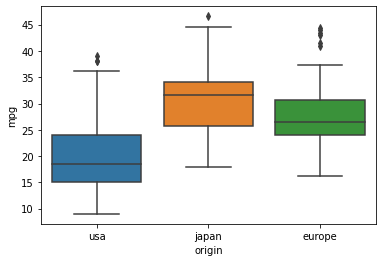

In [ ]:
# boxplot으로 origin별 mpg의 기술통계 값을 구하기
sns.boxplot(data=df, x="origin", y="mpg")

In [ ]:
# groupby로 origin값에 따른 mpg의 기술통계를 구하기
# 결과를 변수에 할당하여 재사용하기
origin_desc = df.groupby("origin")["mpg"].describe()
origin_desc

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
japan,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
usa,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0


## 이상치(극단값, Outlier)

In [ ]:
# origin중 europe만 가져오기
europe = origin_desc.loc["europe"]
europe

count    70.000000
mean     27.891429
std       6.723930
min      16.200000
25%      24.000000
50%      26.500000
75%      30.650000
max      44.300000
Name: europe, dtype: float64

In [ ]:
# IQR,이상치를 제외한 최대값, 최소값 구하기
Q3 = europe["75%"]
Q1 = europe["25%"]
IQR = Q3 - Q1
OUT_MAX = Q3 + 1.5*IQR
OUT_MIN = Q1 - 1.5*IQR
OUT_MAX, OUT_MIN

(40.625, 14.025000000000002)

## boxenplot, violinplot

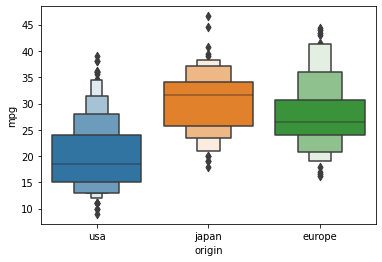

In [ ]:
sns.boxenplot(data=df, x="origin", y="mpg")

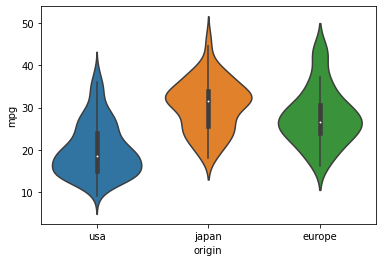

In [ ]:
sns.violinplot(data=df, x="origin", y="mpg")

## 산점도를 통한 범주형 데이터 표현

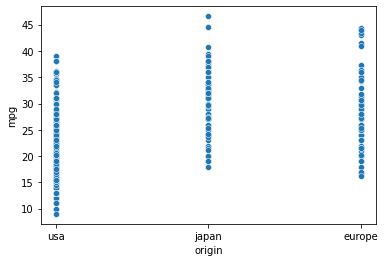

In [ ]:
# scatterplot으로 범주형 변수 그리기
# 겹쳐서 찍히는 데이터들이 많아 분포를 파악하긴 어려움.
sns.scatterplot(data=df, x="origin", y="mpg")

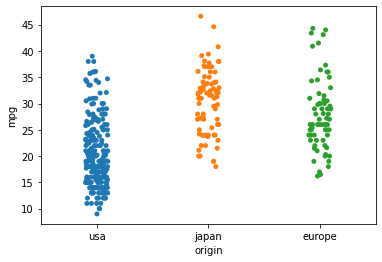

In [ ]:
# stripplot 그리기
# scatterplot보다 겹치지 않고 옆으로 퍼져서 그려짐
# scatterplot보단 낫지만 여전히 정확하진 않음
sns.stripplot(data=df, x="origin", y="mpg")

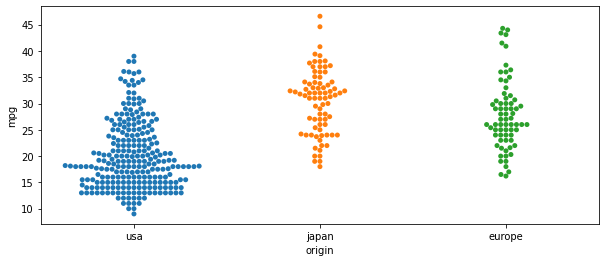

In [ ]:
# swarmplot 그리기
plt.figure(figsize=(10,4))
sns.swarmplot(data=df, x="origin", y="mpg", size=5)

## catplot을 통한 범주형 데이터의 서브플롯 시각화

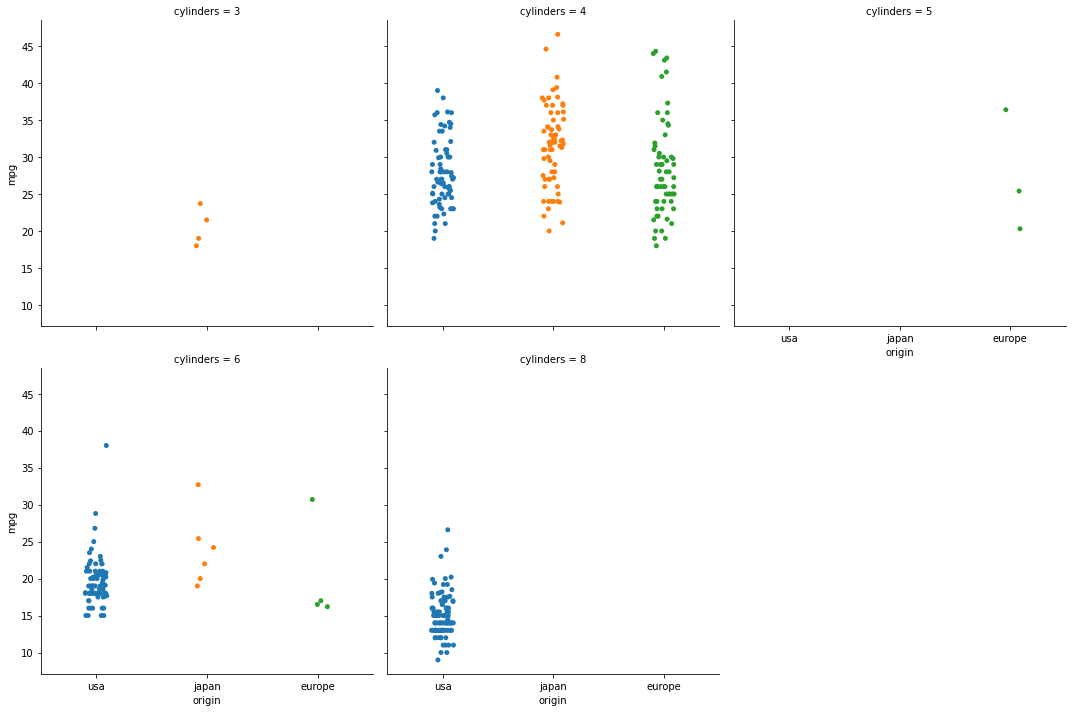

In [ ]:
# catplot (기본 stripplot)
# col_wrap : 한 줄에 그래프를 몇 개col_wrap나 표현할지를 지정
sns.catplot(data=df, x="origin",y="mpg", col="cylinders", col_wrap=3)

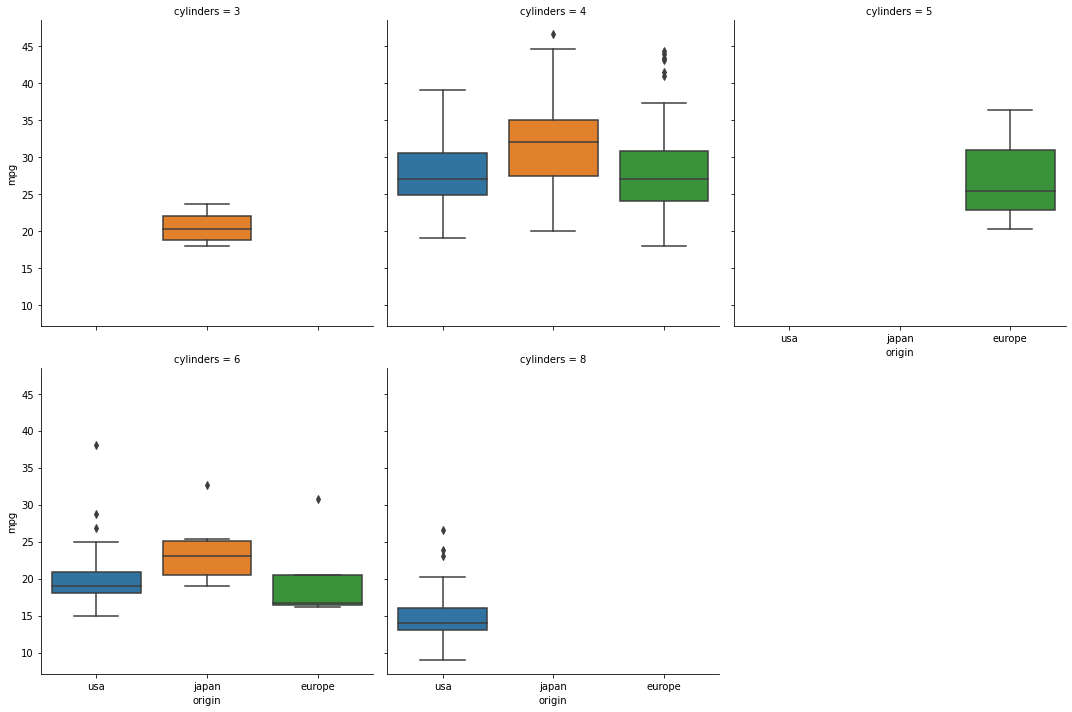

In [ ]:
# catplot으로 boxplot 그리기
sns.catplot(data=df, x="origin",y="mpg", col="cylinders", col_wrap=3, kind="box")

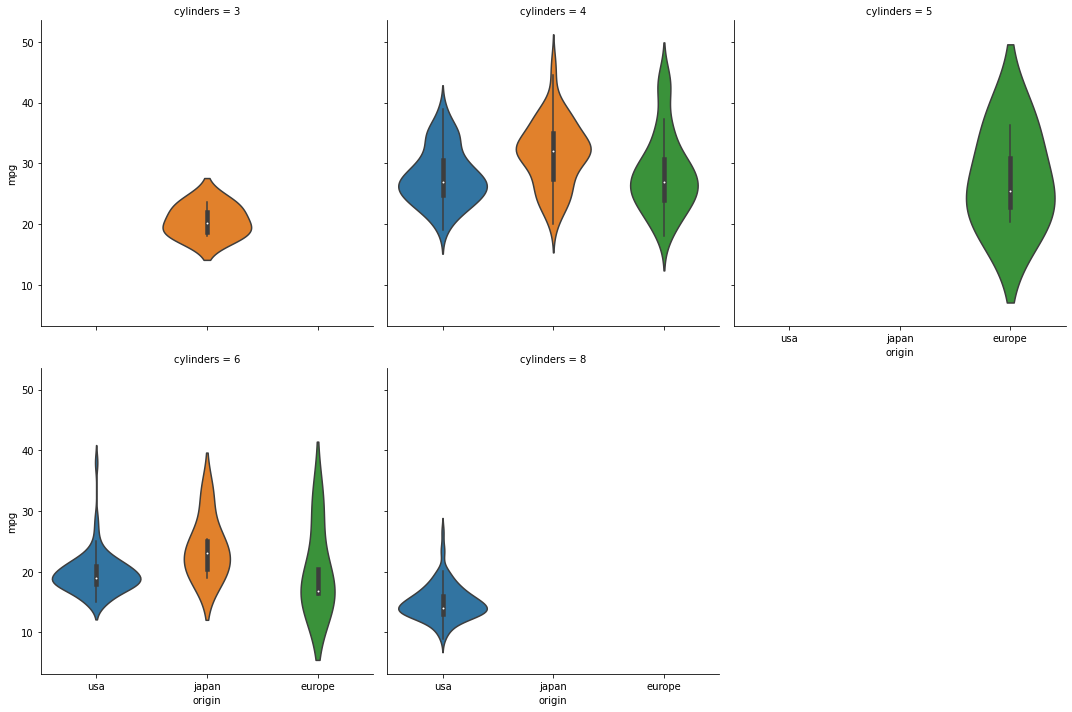

In [ ]:
# catplot으로 violinplot 그리기
sns.catplot(data=df, x="origin",y="mpg", col="cylinders", col_wrap=3, kind="violin")

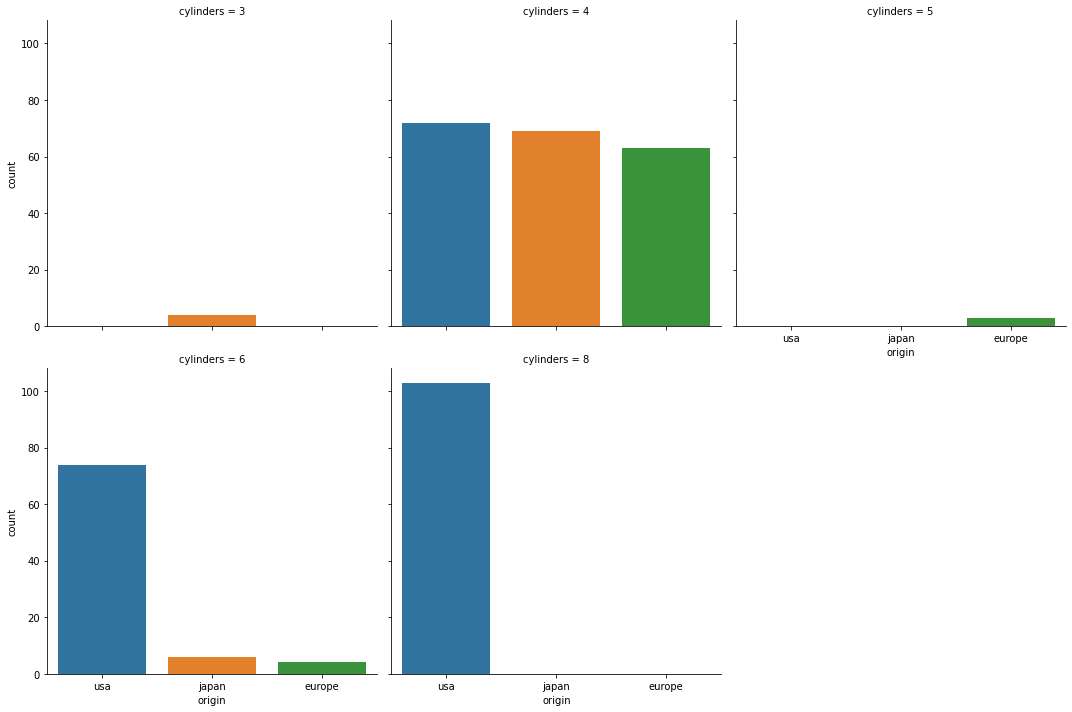

In [ ]:
# catplot으로 countplot 그리기
# 하나의 변수의 갯수를 표현하므로 x나 y에 하나의 column만 지정해줘야 함.
sns.catplot(data=df, x="origin", col="cylinders", col_wrap=3, kind="count")

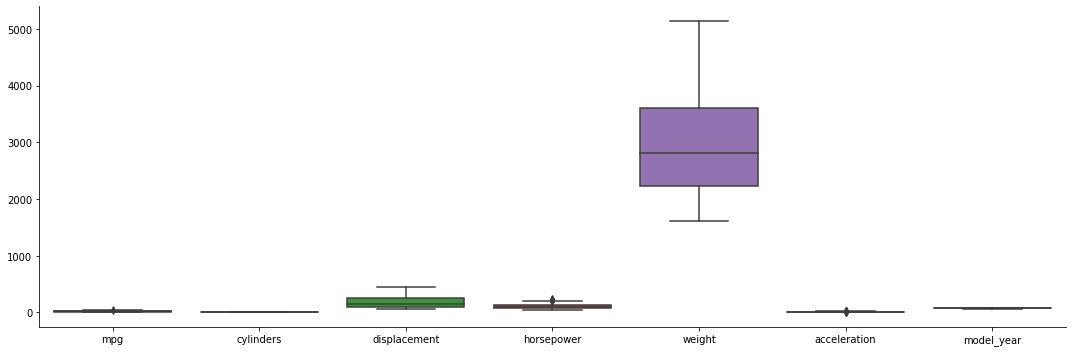

In [ ]:
# catplot으로 boxplot 그리기 
# df 전체 변수에 대해 시각화
# aspect : 전체 그래프 크기 지정
sns.catplot(data=df, kind="box", aspect=3)